In [41]:
pip install pyupbit

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.Collecting prophet
  Using cached prophet-1.1.5-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)



ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\jrnee\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [45]:
import pyupbit

In [46]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2024-03-15 09:00:00,102506000.0,104131000.0,102452000.0,103711000.0,611.436060,6.327565e+10
2024-03-15 10:00:00,103712000.0,103814000.0,103150000.0,103554000.0,314.769824,3.260483e+10
2024-03-15 11:00:00,103552000.0,103690000.0,100000000.0,100467000.0,1366.130243,1.382152e+11
2024-03-15 12:00:00,100467000.0,100992000.0,97100000.0,99100000.0,2581.967108,2.567177e+11
2024-03-15 13:00:00,99104000.0,99511000.0,97482000.0,97915000.0,1911.067853,1.878543e+11
...,...,...,...,...,...,...
2024-03-23 12:00:00,93392000.0,93394000.0,92593000.0,93060000.0,192.655268,1.790493e+10
2024-03-23 13:00:00,93060000.0,93600000.0,93000000.0,93196000.0,147.179282,1.373406e+10
2024-03-23 14:00:00,93196000.0,93556000.0,93000000.0,93510000.0,103.174702,9.628939e+09
2024-03-23 15:00:00,93510000.0,93745000.0,93400000.0,93597000.0,88.114491,8.242385e+09


In [47]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2024-03-15 09:00:00,103711000.0
1,2024-03-15 10:00:00,103554000.0
2,2024-03-15 11:00:00,100467000.0
3,2024-03-15 12:00:00,99100000.0
4,2024-03-15 13:00:00,97915000.0
...,...,...
195,2024-03-23 12:00:00,93060000.0
196,2024-03-23 13:00:00,93196000.0
197,2024-03-23 14:00:00,93510000.0
198,2024-03-23 15:00:00,93597000.0


In [53]:
#prophet 불러옴
from prophet import Prophet

In [54]:
#학습
model = Prophet()
model.fit(data)

17:02:44 - cmdstanpy - INFO - Chain [1] start processing
17:02:45 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

C:\Users\jrnee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jrnee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


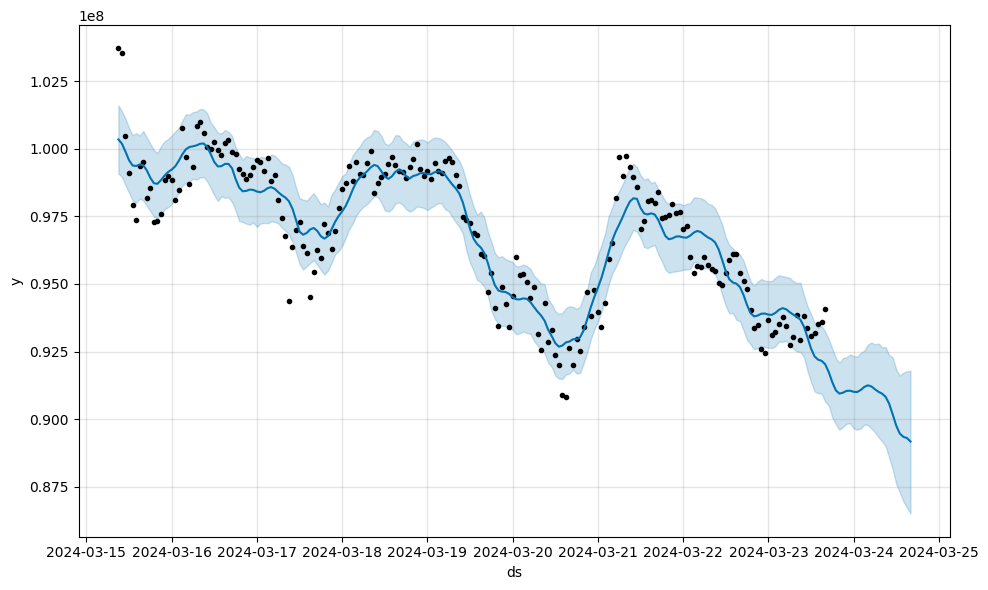

In [56]:
#그래프1
fig1 = model.plot(forecast)

C:\Users\jrnee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jrnee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\jrnee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra

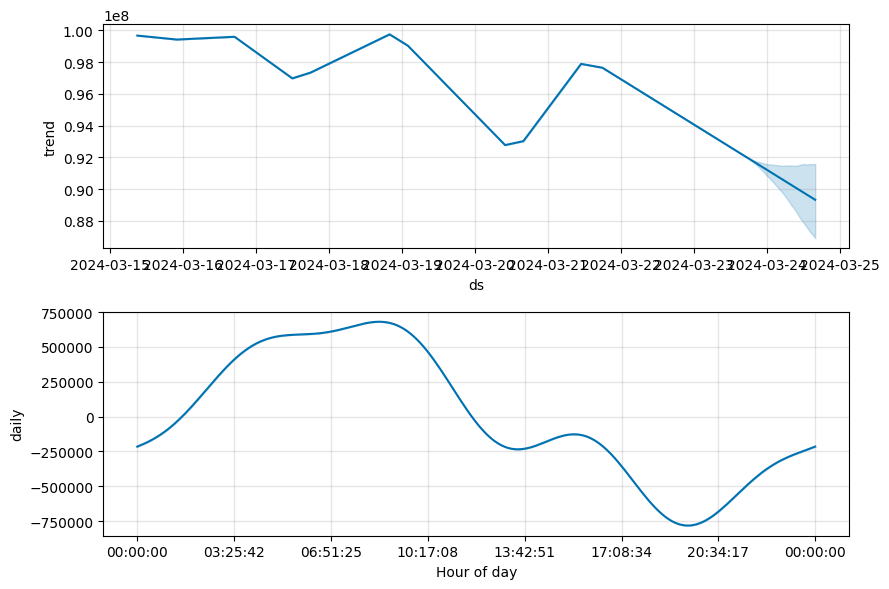

In [57]:
#그래프2
fig2 = model.plot_components(forecast)

In [58]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

94220000.0

In [60]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

90826810.29994607

In [ ]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

In [ ]:
forecast